In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# KMeans
from sklearn.cluster import KMeans

In [2]:
df = pd.read_pickle('../data/pickled_listings_df')

In [3]:
num_only_df = df[['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                'minimum_nights', 'maximum_nights', 'review_scores_rating', 
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 
                'calculated_host_listings_count_shared_rooms', 'host_loc_denver', 'is_superhost', 'needs_license', 
                'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
                'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [4]:
few_categorical_df = df[['price', 'minimum_nights', 'maximum_nights','review_scores_rating','host_loc_denver', 
                        'needs_license','room_type_Entire home/apt', 'room_type_Private room',
                        'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [5]:
y_target_vals = df.loc[:,['is_violating']].values

## Plot PCA, n_components = 5, plot first 2, all num_cat's

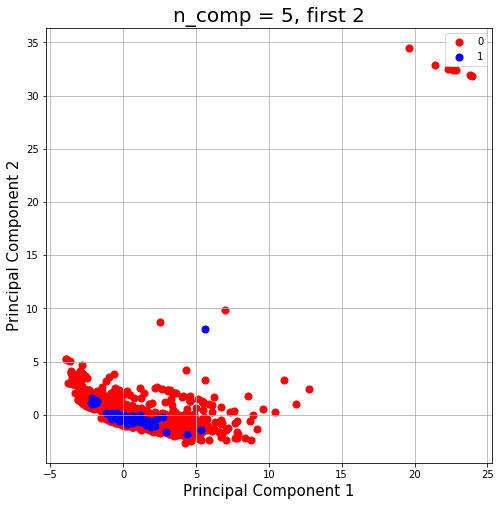

In [6]:
features = ['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']

# Separating out the features
x = num_only_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

num_only_principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = num_only_principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

num_only_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('n_comp = 5, first 2', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = num_only_pcaDf['is_violating'] == target
    ax.scatter(num_only_pcaDf.loc[indicesToKeep, 'principal component 1']
               , num_only_pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

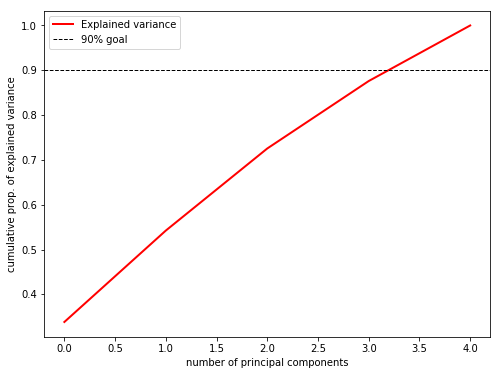

In [7]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

In [8]:
print(f'PCA explained variance is {pca.explained_variance_}')
print(f'\nPCA explained variance ratio is {pca.explained_variance_ratio_}')

PCA explained variance is [4.26104911 2.56824415 2.3060675  1.89507671 1.56103023]

PCA explained variance ratio is [0.19364111 0.11671249 0.10479801 0.08612075 0.07094019]


## KMeans - 10 clusters
#### Plot PCA, n_components = 5, plot first 2, all num_cat's

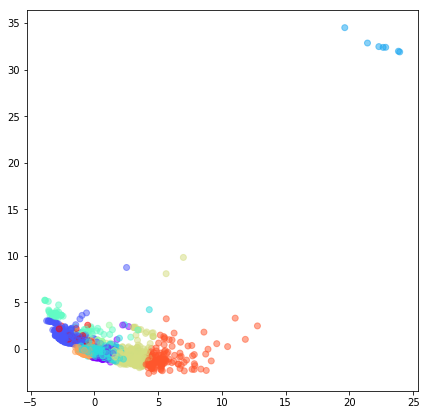

In [9]:
kmeans = KMeans(n_clusters=10)

X_clustered_num = kmeans.fit_predict(num_only_principalComponents)

# Plot the scatter diagram
plt.figure(figsize = (7,7))
plt.scatter(num_only_principalComponents[:,0],num_only_principalComponents[:,1], 
            c=kmeans.labels_,cmap='rainbow', alpha=0.5) 


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


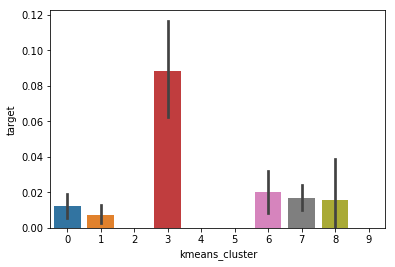

In [10]:
numkmeans = kmeans.labels_

kmeans_y = y_target_vals
kmeans_y = kmeans_y.reshape(4511)

num_KMeansDF = pd.DataFrame({'kmeans_cluster':numkmeans, 'target':kmeans_y})

sns.barplot(x='kmeans_cluster',y='target',data=num_KMeansDF)

In [11]:
num_8 = num_KMeansDF.loc[num_KMeansDF['kmeans_cluster'] == 4]
num_8.loc[2500:3000]

,kmeans_cluster,target
2536,4,0.0
2788,4,0.0
2814,4,0.0
2987,4,0.0


In [12]:
df.loc[[2987]]

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,...,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,list_loc_denver,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,is_violating
2987,27289914,https://www.airbnb.com/rooms/27289914,::BOOK NOW SPOTS ARE FILLING UP FAST: Red rock...,.::IF BOOKING LONGER THAT TWO WEEKS PLEASE GET...,::BOOK NOW SPOTS ARE FILLING UP FAST: Red rock...,I do have a two year old son. Every one that h...,"Guest are able to use female dorm, kitchen and...",I am more than willing to give plenty of space...,COMMON HOUSE RULES 1. No guest that is not boo...,175151029,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0


## Plot PCA, n_components = 5, plot first 2, all num_cat's

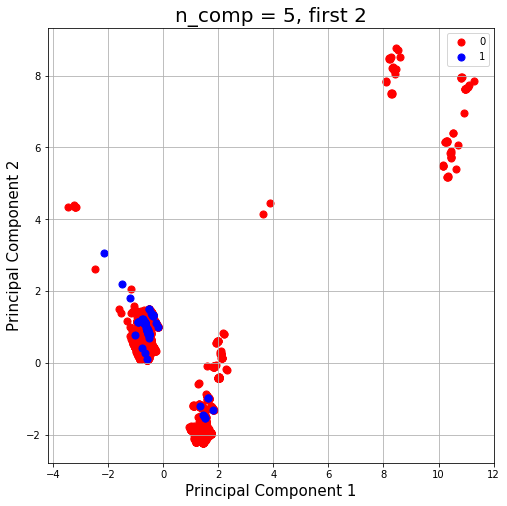

In [13]:
features = ['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']

# Separating out the feature
x = few_categorical_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

few_principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = few_principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

few_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('n_comp = 5, first 2', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = few_pcaDf['is_violating'] == target
    ax.scatter(few_pcaDf.loc[indicesToKeep, 'principal component 1']
               , few_pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


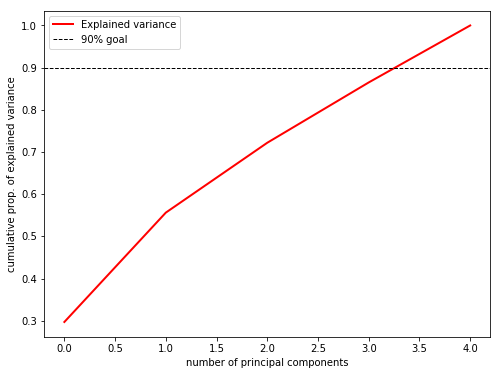

In [14]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

## KMeans

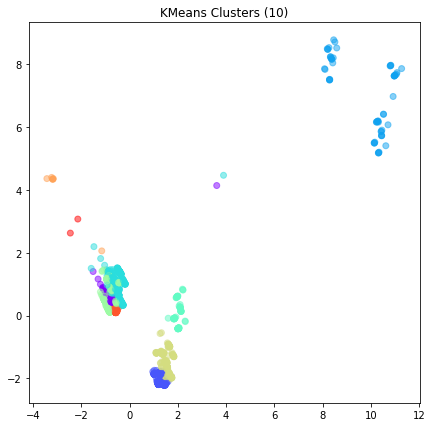

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'test')

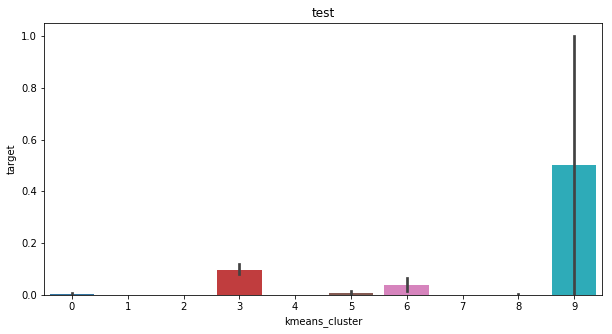

In [15]:
kmeans = KMeans(n_clusters=10)

X_clustered_num = kmeans.fit_predict(few_principalComponents)

# Plot the scatter diagram
plt.figure(figsize = (7,7))
plt.scatter(few_principalComponents[:,0],few_principalComponents[:,1], 
            c=kmeans.labels_,cmap='rainbow', alpha=0.5) 
plt.title('KMeans Clusters (10)')
plt.show()

plt.figure(figsize=(10,5))
fewkmeans = kmeans.labels_
kmeans_y = y_target_vals
kmeans_y = kmeans_y.reshape(4511)
fewKMeansDF = pd.DataFrame({'kmeans_cluster':fewkmeans, 'target':kmeans_y})
sns.barplot(x='kmeans_cluster',y='target',data=fewKMeansDF)
plt.title('test')

In [19]:
few_9 = fewKMeansDF.loc[fewKMeansDF['kmeans_cluster'] == 9]
few_9.loc[2000:3000]

,kmeans_cluster,target
2275,9,0.0


In [20]:
df.loc[[2275]]

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,...,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,list_loc_denver,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,is_violating
2275,22849523,https://www.airbnb.com/rooms/22849523,Hip and chic 2nd floor condo in between beauti...,Tons of early 1900's character with exposed br...,Hip and chic 2nd floor condo in between beauti...,none,"Guests will have access to the entire unit, sa...","You will have help if you need it, whether fro...",none,168980048,...,1.0,0.0,1.0,0.0,1.0,1,0,0,0.0,0.0


In [18]:
# fewkmeans = kmeans.labels_

# kmeans_y = y_target_vals
# kmeans_y = kmeans_y.reshape(4511)

# fewKMeansDF = pd.DataFrame({'kmeans_cluster':fewkmeans, 'target':kmeans_y})

# sns.barplot(x='kmeans_cluster',y='target',data=fewKMeansDF)